In [1]:
import numpy as np
import bilby

In [2]:
outdir = 'outdir/injection_result'
label = 'bbh_injection'
bilby.core.utils.setup_logger(outdir=outdir, label=label)

In [3]:
np.random.seed(1234567)

minimum_frequency = 20.
reference_frequency = 100.
duration = 4.0
sampling_frequency = 2048.
#approximant = 'TaylorF2' 

In [4]:
# We are going to inject a binary black hole waveform.  We first establish a
# dictionary of parameters that includes all of the different waveform
# parameters, including masses of the two black holes (mass_1, mass_2),
# spins of both black holes (a, tilt, phi), etc.
injection_parameters = dict(
    mass_1=36.0,
    mass_2=29.0,
    a_1=0.4,
    a_2=0.3,
    tilt_1=0.5,
    tilt_2=1.0,
    phi_12=1.7,
    phi_jl=0.3,
    luminosity_distance=2000.0,
    theta_jn=0.4,
    psi=2.659,
    phase=1.3,
    geocent_time=1126259642.413,
    ra=1.375,
    dec=-1.2108,
)


In [5]:
# Fixed arguments passed into the source model
waveform_arguments = dict(
    waveform_approximant="IMRPhenomPv2",
    reference_frequency=reference_frequency,
    minimum_frequency=minimum_frequency,
)


In [6]:
# Create the waveform_generator using a LAL BinaryBlackHole source function
waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_binary_black_hole,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=waveform_arguments,
)

11:02 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [7]:
# Set up interferometers.  In this case we'll use two interferometers
# (LIGO-Hanford (H1), LIGO-Livingston (L1). These default to their design
# sensitivity
ifos = bilby.gw.detector.InterferometerList(["H1", "L1"])
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency,
    duration=duration,
    start_time=injection_parameters["geocent_time"] - 2,
)
ifos.inject_signal(
    waveform_generator=waveform_generator, parameters=injection_parameters
)


11:02 bilby INFO    : Injected signal in H1:
11:02 bilby INFO    :   optimal SNR = 11.81
11:02 bilby INFO    :   matched filter SNR = 11.85-0.82j
11:02 bilby INFO    :   mass_1 = 36.0
11:02 bilby INFO    :   mass_2 = 29.0
11:02 bilby INFO    :   a_1 = 0.4
11:02 bilby INFO    :   a_2 = 0.3
11:02 bilby INFO    :   tilt_1 = 0.5
11:02 bilby INFO    :   tilt_2 = 1.0
11:02 bilby INFO    :   phi_12 = 1.7
11:02 bilby INFO    :   phi_jl = 0.3
11:02 bilby INFO    :   luminosity_distance = 2000.0
11:02 bilby INFO    :   theta_jn = 0.4
11:02 bilby INFO    :   psi = 2.659
11:02 bilby INFO    :   phase = 1.3
11:02 bilby INFO    :   geocent_time = 1126259642.413
11:02 bilby INFO    :   ra = 1.375
11:02 bilby INFO    :   dec = -1.2108
11:02 bilby INFO    : Injected signal in L1:
11:02 bilby INFO    :   optimal SNR = 9.56
11:02 bilby INFO    :   matched filter SNR = 10.05+0.45j
11:02 bilby INFO    :   mass_1 = 36.0
11:02 bilby INFO    :   mass_2 = 29.0
11:02 bilby INFO    :   a_1 = 0.4
11:02 bilby INFO

[{'plus': array([0.-0.j, 0.-0.j, 0.-0.j, ..., 0.-0.j, 0.-0.j, 0.-0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([0.-0.j, 0.-0.j, 0.-0.j, ..., 0.-0.j, 0.-0.j, 0.-0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}]

In [8]:
priors = bilby.gw.prior.BBHPriorDict()
for key in [
    "a_1",
    "a_2",
    "tilt_1",
    "tilt_2",
    "phi_12",
    "phi_jl",
    "psi",
    "ra",
    "dec",
    "geocent_time",
    "phase",
]:
    priors[key] = injection_parameters[key]

11:02 bilby INFO    : No prior given, using default BBH priors in /Users/naresh/miniconda3/envs/multiband_tgr/lib/python3.9/site-packages/bilby/gw/prior_files/precessing_spins_bbh.prior.


In [9]:
priors.validate_prior(duration, minimum_frequency)

True

In [10]:
likelihood = bilby.gw.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator
)

In [11]:
result = bilby.run_sampler(
    likelihood=likelihood,
    priors=priors,
    sampler="dynesty",
    npoints=1000,
    injection_parameters=injection_parameters,
    outdir=outdir,
    label=label,
    npool = 4
)

11:02 bilby INFO    : Running for label 'bbh_injection', output will be saved to 'outdir/injection_result'
11:02 bilby INFO    : Using lal version 7.1.7
11:02 bilby INFO    : Using lal git version Branch: None;Tag: lal-v7.1.7;Id: c0930b69d9f2ad7151d1cadea5df72633ec47e67;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
11:02 bilby INFO    : Using lalsimulation version 3.1.2
11:02 bilby INFO    : Using lalsimulation git version Branch: None;Tag: lalsimulation-v3.1.2;Id: 8c3a6977aa553c9a2019ec287a61dc5ee92087b4;;Builder: Adam Mercer <adam.mercer@ligo.org>;Repository status: CLEAN: All modifications committed
11:02 bilby INFO    : Search parameters:
11:02 bilby INFO    :   mass_ratio = Uniform(minimum=0.125, maximum=1, name='mass_ratio', latex_label='$q$', unit=None, boundary=None)
11:02 bilby INFO    :   chirp_mass = Uniform(minimum=25, maximum=100, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=None)
11:02 bilby INFO

0it [00:00, ?it/s]

11:02 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 1800, 'nlive': 1000, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 4, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 600, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x166badeb0>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5, 'print_method': 'tqdm'}
11:02 bilby INFO    : Checkpoint every check_point_delta_t = 600s
11:02 bilby INFO    : Using dynesty version 1.0.1
11:02 bilby INFO    : Using the bilby

5081it [10:13,  3.30it/s, bound:651 nc:296 ncall:4.9e+05 eff:1.0% logz-ratio=55.21+/-0.12 dlogz:58.716>0.1]  

11:13 bilby INFO    : Written checkpoint file outdir/injection_result/bbh_injection_resume.pickle


6738it [20:16,  2.56it/s, bound:1366 nc:476 ncall:1.0e+06 eff:0.7% logz-ratio=78.47+/-0.13 dlogz:33.794>0.1]

11:23 bilby INFO    : Written checkpoint file outdir/injection_result/bbh_injection_resume.pickle


8225it [30:21,  2.35it/s, bound:2072 nc:417 ncall:1.5e+06 eff:0.5% logz-ratio=93.08+/-0.13 dlogz:19.653>0.1]

11:33 bilby INFO    : Written checkpoint file outdir/injection_result/bbh_injection_resume.pickle


9528it [40:25,  2.24it/s, bound:2716 nc:365 ncall:2.0e+06 eff:0.5% logz-ratio=100.49+/-0.14 dlogz:10.938>0.1]

11:43 bilby INFO    : Written checkpoint file outdir/injection_result/bbh_injection_resume.pickle


10801it [50:30,  1.17it/s, bound:3353 nc:334 ncall:2.5e+06 eff:0.4% logz-ratio=104.68+/-0.14 dlogz:5.518>0.1]

11:53 bilby INFO    : Written checkpoint file outdir/injection_result/bbh_injection_resume.pickle


12024it [1:00:38,  2.18it/s, bound:3965 nc:412 ncall:3.0e+06 eff:0.4% logz-ratio=106.60+/-0.15 dlogz:2.467>0.1]

12:03 bilby INFO    : Written checkpoint file outdir/injection_result/bbh_injection_resume.pickle


13190it [1:10:47,  1.93it/s, bound:4549 nc:431 ncall:3.5e+06 eff:0.4% logz-ratio=107.39+/-0.15 dlogz:0.923>0.1]

12:13 bilby INFO    : Written checkpoint file outdir/injection_result/bbh_injection_resume.pickle


14389it [1:20:55,  1.71it/s, bound:5148 nc:407 ncall:4.0e+06 eff:0.4% logz-ratio=107.72+/-0.15 dlogz:0.310>0.1]

12:23 bilby INFO    : Written checkpoint file outdir/injection_result/bbh_injection_resume.pickle


15457it [1:31:03,  1.67it/s, bound:5682 nc:381 ncall:4.4e+06 eff:0.4% logz-ratio=107.83+/-0.15 dlogz:0.106>0.1]

12:34 bilby INFO    : Written checkpoint file outdir/injection_result/bbh_injection_resume.pickle


15512it [1:31:49,  1.57it/s, bound:5710 nc:404 ncall:4.4e+06 eff:0.4% logz-ratio=107.84+/-0.15 dlogz:0.100>0.1]

12:34 bilby INFO    : Written checkpoint file outdir/injection_result/bbh_injection_resume.pickle
12:34 bilby INFO    : Starting to close worker pool.
12:34 bilby INFO    : Finished closing worker pool.


15512it [1:32:01,  2.81it/s, bound:5710 nc:  1 ncall:4.4e+06 eff:0.4% logz-ratio=107.91+/-0.15 dlogz:0.000>0.1]



12:35 bilby INFO    : Sampling time: 1:31:36.198774
12:35 bilby INFO    : Summary of results:
nsamples: 16512
ln_noise_evidence: -8140.892
ln_evidence: -8032.986 +/-  0.153
ln_bayes_factor: 107.907 +/-  0.153



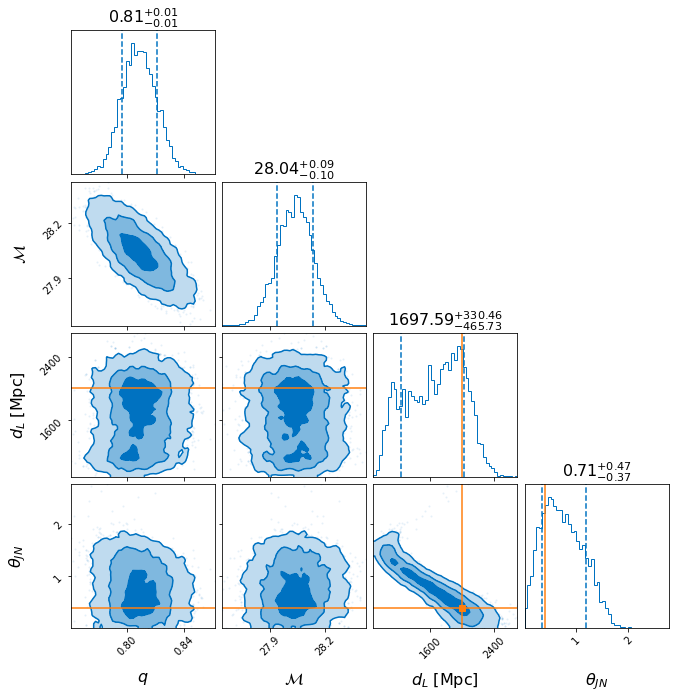

In [12]:
result.plot_corner()

In [2]:
 m1=36.0
 m2=29.0,

In [3]:
def mass_ratio(m1, m2):
    q = m2/m1
    return q

In [4]:
mass_ratio(36.0,29.0)

0.8055555555555556

In [5]:
def chirp_mass(m1,m2):
    M_c = (m1*m2)**(0.6)/(m1+m2)**(0.2) 
    return M_c

In [6]:
chirp_mass(36.0,29.0)

28.09555579546043

In [12]:
path = '/Users/naresh/Documents/gw_pe/outdir/injection_result/'

In [13]:
output_pe = bilby.result.read_in_result(filename = path + 'bbh_injection_result.json')

In [14]:
output_pe.sampling_time

datetime.timedelta(seconds=5496, microseconds=198774)

In [32]:

#output_pe.sampler_kwargs

In [19]:

output_pe.parameter_labels

['$q$', '$\\mathcal{M}$', '$d_L$', '$\\theta_{JN}$']

In [23]:
true_value = {"mass_ratio" : 0.805, "chirp_mass" : 28.095, "luminosity_distance" : 2000.0 , 
                  "theta_jn" : 0.4}
           

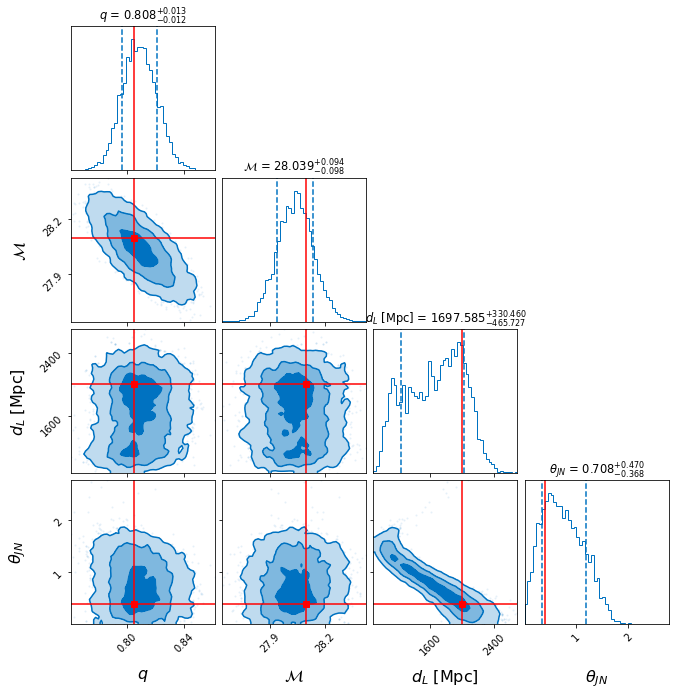

In [39]:
output_pe.plot_corner(true_value, show_titles=True,
    title_fmt=".3f",
    title_kwargs=dict(fontstyle = 'normal',fontsize=11.5), truth_color = 'r')

In [33]:
import matplotlib.pyplot as plt
